In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('unzipped_archive/bmw.csv')

In [3]:
# train = 60%, validate = 20%, test = 20%

# сначала определяем train = 60%:

train, test = train_test_split(df, train_size = 0.6, random_state = 42)

In [4]:
# теперь определяем валидационную выборку и test - как 50% на 50% (от теста)
 
val, test = train_test_split(test, train_size = 0.5, random_state = 42)

In [5]:
# список фичей сохраняем в переменную Х (x-большое):

X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']

In [6]:
# целевой признак сохраняем в переменную y (y-маленькое):

y = ['price']

In [7]:
# определяем категориальные фичи:

cat_features = ['model', 'transmission', 'fuelType']

In [8]:
from catboost import CatBoostRegressor

In [9]:
# зададим параметры отдельно через словарь:

# Количество итераций (early_stopping_rounds - если улучшений нет за 200 итераций - останов) 


# и learning rate (скорость обучения) - если итераций сдалано 999, то результат не достигнут, надо поднять 'learning rate'

parameters = {'cat_features': cat_features, 
              'eval_metric': 'MAPE', 
              'verbose': 100, 
              'random_seed': 42, 
              'learning_rate': 0.1,
             'early_stopping_rounds': 200}

In [16]:
# передаем КэтБусту заданные параметры:

model = CatBoostRegressor(**parameters)

In [17]:
model.fit(train[X], train[y], eval_set = (val[X], val[y]))

0:	learn: 0.4491299	test: 0.4449016	best: 0.4449016 (0)	total: 220ms	remaining: 3m 40s
100:	learn: 0.0829479	test: 0.0830945	best: 0.0830945 (100)	total: 3.71s	remaining: 33.1s
200:	learn: 0.0732719	test: 0.0763974	best: 0.0763974 (200)	total: 7.16s	remaining: 28.5s
300:	learn: 0.0685621	test: 0.0738183	best: 0.0738183 (300)	total: 10.8s	remaining: 25.2s
400:	learn: 0.0657582	test: 0.0726470	best: 0.0726470 (400)	total: 14.4s	remaining: 21.5s
500:	learn: 0.0633050	test: 0.0716095	best: 0.0716095 (500)	total: 17.9s	remaining: 17.9s
600:	learn: 0.0610428	test: 0.0709616	best: 0.0709616 (600)	total: 21.5s	remaining: 14.3s
700:	learn: 0.0594802	test: 0.0705935	best: 0.0705861 (693)	total: 25s	remaining: 10.6s
800:	learn: 0.0578323	test: 0.0702997	best: 0.0702942 (799)	total: 28.5s	remaining: 7.07s
900:	learn: 0.0563487	test: 0.0700166	best: 0.0700061 (898)	total: 32s	remaining: 3.52s
999:	learn: 0.0553459	test: 0.0700034	best: 0.0699662 (947)	total: 35.5s	remaining: 0us

bestTest = 0.06996

In [18]:
# Работаем на выборке test:

model.predict(test[X])

array([57518.64230726, 22536.17573899, 13429.38891842, ...,
       29519.61669918, 13880.65024998, 24897.29457096])

In [19]:
# Задаем новую колонку с предиктом цены:

test['price_predict'] = model.predict(test[X])

In [20]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_predict
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57518.642307
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22536.175739
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13429.388918
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32466.437079
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.576980
...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14446.628320
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30805.438318
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29519.616699
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13880.650250


In [21]:
# расчет MAE:

test['err'] = abs(test['price_predict'] - test['price'])
test['err'].mean()

1535.8605061578996

In [22]:
# расчет МАРЕ:

test['err_percent'] = test['err'] / test['price']
test['err_percent'].mean()

0.07304063368042103

# Анализ ошибок

In [23]:
# Посмотрим на распределение ошибок, без модуля (будем понимать занижаем мы цену или завышаем):

test['err_NO_abs'] = test['price_predict'] - test['price']

In [24]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_predict,err,err_percent,err_NO_abs
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57518.642307,4528.642307,0.085462,4528.642307
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22536.175739,1544.824261,0.064151,-1544.824261
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13429.388918,430.388918,0.033109,430.388918
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32466.437079,20471.437079,1.706664,20471.437079
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.576980,5225.576980,0.174915,5225.576980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14446.628320,552.371680,0.036827,-552.371680
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30805.438318,1129.438318,0.038059,1129.438318
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29519.616699,1050.383301,0.034360,-1050.383301
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13880.650250,1118.349750,0.074562,-1118.349750


<Axes: >

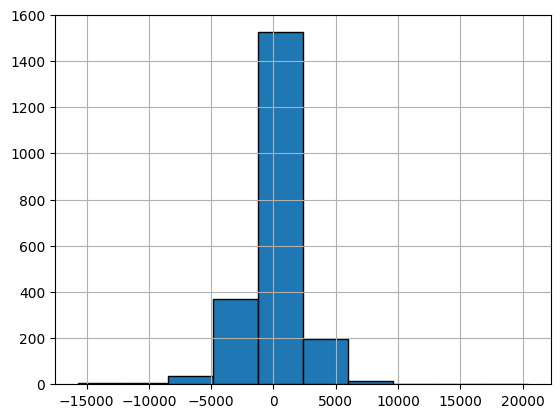

In [25]:
# посмотрим на распределение этой ошибки:

test.err_NO_abs.hist(edgecolor = 'black')

In [24]:
# можно определить ошибка идет больше в плюс или в минус:

# вот пример:

print(np.mean([-2000, 2000]))
print(np.mean([-2000, 2200]))
print(np.mean([-2200, 2000]))

0.0
100.0
-100.0


In [26]:
# в нашем случае ошибка:

# (результат говорит о том, что модель очень слабо но завышает оценку авто)

test.err_NO_abs.mean()

161.73410012282366

# Абсолютная ошибка

In [26]:
# Это модуль test['err_NO_abs']
test['err'] = abs(test['err_NO_abs'])

In [31]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_predict,err,err_percent,err_NO_abs
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57966.173921,4976.173921,0.093908,4976.173921
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22162.117851,1918.882149,0.079684,-1918.882149
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13362.219710,363.219710,0.027942,363.219710
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,33157.204989,21162.204989,1.764252,21162.204989
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35179.163689,5304.163689,0.177545,5304.163689
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14266.874033,732.125967,0.048812,-732.125967
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30932.707293,1256.707293,0.042348,1256.707293
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,30466.169633,103.830367,0.003396,-103.830367
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,14202.084650,796.915350,0.053131,-796.915350


<Axes: >

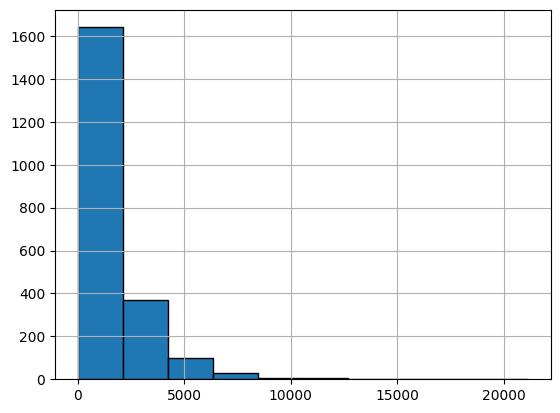

In [32]:
test['err'].hist(edgecolor = 'black')

In [33]:
test['err'].describe()

count     2157.000000
mean      1596.051166
std       1721.454589
min          0.077013
25%        512.058107
50%       1111.036879
75%       2031.647668
max      21162.204989
Name: err, dtype: float64

In [27]:
# посмотрим самые большие ошибки: (топ-10 ошибок)

test.sort_values(by = 'err', ascending = False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_predict,err,err_percent,err_NO_abs
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32466.437079,20471.437079,1.706664,20471.437079
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31813.971590,15736.028410,0.330936,-15736.028410
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28217.113216,14302.886784,0.336380,-14302.886784
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,84722.734120,13727.734120,0.193362,13727.734120
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32355.954817,12624.045183,0.280659,-12624.045183
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30101.920278,12393.079722,0.291636,-12393.079722
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46372.797246,12289.202754,0.209492,-12289.202754
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,48825.636478,11173.363522,0.186226,-11173.363522
5264,5 Series,2019,38450,Automatic,14522,Diesel,145,62.8,2.0,27328.799835,11121.200165,0.289238,-11121.200165
4245,Z4,2020,50800,Semi-Auto,1142,Petrol,145,33.2,3.0,39946.678368,10853.321632,0.213648,-10853.321632


# Подробный анализ абсолютной ошибки

In [28]:
# Для того чтобы оценить ошибку надо отсортировать машины по цене и посмотреть на их среднюю ошибку в группах

# Для того чтобы это сделать надо побить цены на интервалы

test['price_group'] = pd.qcut(test['price'], 5)

In [29]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_predict,err,err_percent,err_NO_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57518.642307,4528.642307,0.085462,4528.642307,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22536.175739,1544.824261,0.064151,-1544.824261,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13429.388918,430.388918,0.033109,430.388918,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32466.437079,20471.437079,1.706664,20471.437079,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.576980,5225.576980,0.174915,5225.576980,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14446.628320,552.371680,0.036827,-552.371680,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30805.438318,1129.438318,0.038059,1129.438318,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29519.616699,1050.383301,0.034360,-1050.383301,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13880.650250,1118.349750,0.074562,-1118.349750,"(13995.0, 18500.0]"


In [30]:
t = test.groupby('price_group')['err', 'err_NO_abs'].agg(['count', 'mean'])

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\2640301868.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby('price_group')['err', 'err_NO_abs'].agg(['count', 'mean'])


In [31]:
t

err              err_NO_abs            
                    count         mean      count        mean
price_group                                                  
(1199.999, 13995.0]   435   906.765688        435  468.881292
(13995.0, 18500.0]    432  1173.587389        432  262.313238
(18500.0, 23131.6]    427  1302.391805        427  234.891145
(23131.6, 29990.0]    432  1730.233570        432  366.256442
(29990.0, 74990.0]    431  2570.385342        431 -826.712121

In [32]:
# Flatten multi index

t.columns = list(map('_'.join, t.columns.values))

In [33]:
t

,err_count,err_mean,err_NO_abs_count,err_NO_abs_mean
price_group,,,,
"(1199.999, 13995.0]",435,906.765688,435,468.881292
"(13995.0, 18500.0]",432,1173.587389,432,262.313238
"(18500.0, 23131.6]",427,1302.391805,427,234.891145
"(23131.6, 29990.0]",432,1730.233570,432,366.256442
"(29990.0, 74990.0]",431,2570.385342,431,-826.712121


In [34]:
t.drop('err_NO_abs_count', axis = 1, inplace = True)

In [35]:
# разница от средней ошибки для каждой группы по цене 

t['difference_with_mean_err'] = t['err_mean'] - test['err'].mean()

In [36]:
# также добавим в сводник и саму среднюю ошибку:

t['test_MAE'] = test['err'].mean()

In [37]:
t

,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
price_group,,,,,
"(1199.999, 13995.0]",435,906.765688,468.881292,-629.094818,1535.860506
"(13995.0, 18500.0]",432,1173.587389,262.313238,-362.273117,1535.860506
"(18500.0, 23131.6]",427,1302.391805,234.891145,-233.468701,1535.860506
"(23131.6, 29990.0]",432,1730.233570,366.256442,194.373064,1535.860506
"(29990.0, 74990.0]",431,2570.385342,-826.712121,1034.524835,1535.860506


In [38]:
# pandas conditional formating

import seaborn as sns

# светлая тема: (вся таблица)
# cm = sns.light_palette("green", as_cmap=True)

# темная тема: (вся таблица)
cm = sns.dark_palette("red", as_cmap=True)

# (вся таблица)
# t = t.style.background_gradient(cmap=cm)
# t


# (выбранный subset)
t = t.style.background_gradient(cmap=cm, subset = 'difference_with_mean_err')
t

,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
price_group,,,,,
"(1199.999, 13995.0]",435,906.765688,468.881292,-629.094818,1535.860506
"(13995.0, 18500.0]",432,1173.587389,262.313238,-362.273117,1535.860506
"(18500.0, 23131.6]",427,1302.391805,234.891145,-233.468701,1535.860506
"(23131.6, 29990.0]",432,1730.233570,366.256442,194.373064,1535.860506
"(29990.0, 74990.0]",431,2570.385342,-826.712121,1034.524835,1535.860506


# Анализ абсолютной ошибки относительно других переменных

In [39]:
# сделаем сводник по году:

test.groupby(['year'])['err', 'err_NO_abs'].agg(['count', 'mean'])

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\1346823403.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test.groupby(['year'])['err', 'err_NO_abs'].agg(['count', 'mean'])


err              err_NO_abs             
     count         mean      count         mean
year                                           
1996     1  6860.653294          1  6860.653294
1999     1   889.096048          1   889.096048
2001     1  1426.452188          1  1426.452188
2002     2  4218.752179          2 -1699.042405
2003     1  2576.709173          1 -2576.709173
2004     4  1726.743552          4  -186.262833
2006     3  1510.479435          3  1510.479435
2007     2  2293.614874          2  2097.322395
2008     4  2739.873849          4  2739.873849
2009     6   853.747344          6   399.908979
2010     3  2265.775457          3  1794.665044
2011    12   574.564729         12   266.913928
2012    28   955.125330         28    40.690563
2013    73  1056.386772         73   -30.413173
2014    97   903.349472         97    34.792793
2015   179  1226.574228        179   167.569837
2016   360  1021.343177        360     2.694294
2017   330  1219.020360        330   -79.004093
2018   168  1541.373955        168   107.427775
2019   726  1874.300995        726   144.219149
2020   156  2860.038032        156   361.692746

In [40]:
t = test.groupby(['year'])['err', 'err_NO_abs'].agg(['count', 'mean'])

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\2580276294.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(['year'])['err', 'err_NO_abs'].agg(['count', 'mean'])


In [41]:
t

err              err_NO_abs             
     count         mean      count         mean
year                                           
1996     1  6860.653294          1  6860.653294
1999     1   889.096048          1   889.096048
2001     1  1426.452188          1  1426.452188
2002     2  4218.752179          2 -1699.042405
2003     1  2576.709173          1 -2576.709173
2004     4  1726.743552          4  -186.262833
2006     3  1510.479435          3  1510.479435
2007     2  2293.614874          2  2097.322395
2008     4  2739.873849          4  2739.873849
2009     6   853.747344          6   399.908979
2010     3  2265.775457          3  1794.665044
2011    12   574.564729         12   266.913928
2012    28   955.125330         28    40.690563
2013    73  1056.386772         73   -30.413173
2014    97   903.349472         97    34.792793
2015   179  1226.574228        179   167.569837
2016   360  1021.343177        360     2.694294
2017   330  1219.020360        330   -79.004093
2018   168  1541.373955        168   107.427775
2019   726  1874.300995        726   144.219149
2020   156  2860.038032        156   361.692746

In [42]:
# Flatten multi index

t.columns = list(map('_'.join, t.columns.values))

In [43]:
t

,err_count,err_mean,err_NO_abs_count,err_NO_abs_mean
year,,,,
1996,1,6860.653294,1,6860.653294
1999,1,889.096048,1,889.096048
2001,1,1426.452188,1,1426.452188
2002,2,4218.752179,2,-1699.042405
2003,1,2576.709173,1,-2576.709173
2004,4,1726.743552,4,-186.262833
2006,3,1510.479435,3,1510.479435
2007,2,2293.614874,2,2097.322395
2008,4,2739.873849,4,2739.873849


In [44]:
t.drop('err_NO_abs_count', axis = 1, inplace = True)

In [45]:
# разница от средней ошибки для каждой группы по цене 

t['difference_with_mean_err'] = t['err_mean'] - test['err'].mean()

In [46]:
# также добавим в сводник и саму среднюю ошибку:

t['test_MAE'] = test['err'].mean()

In [47]:
t

,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
year,,,,,
1996,1,6860.653294,6860.653294,5324.792787,1535.860506
1999,1,889.096048,889.096048,-646.764458,1535.860506
2001,1,1426.452188,1426.452188,-109.408318,1535.860506
2002,2,4218.752179,-1699.042405,2682.891672,1535.860506
2003,1,2576.709173,-2576.709173,1040.848667,1535.860506
2004,4,1726.743552,-186.262833,190.883046,1535.860506
2006,3,1510.479435,1510.479435,-25.381071,1535.860506
2007,2,2293.614874,2097.322395,757.754368,1535.860506
2008,4,2739.873849,2739.873849,1204.013343,1535.860506


In [48]:
# pandas conditional formating

import seaborn as sns

# светлая тема: (вся таблица)
# cm = sns.light_palette("green", as_cmap=True)

# темная тема: (вся таблица)
cm = sns.dark_palette("red", as_cmap=True)

# (вся таблица)
# t = t.style.background_gradient(cmap=cm)
# t


# (выбранный subset)
t = t.style.background_gradient(cmap=cm, subset = 'difference_with_mean_err')
t

,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
year,,,,,
1996,1,6860.653294,6860.653294,5324.792787,1535.860506
1999,1,889.096048,889.096048,-646.764458,1535.860506
2001,1,1426.452188,1426.452188,-109.408318,1535.860506
2002,2,4218.752179,-1699.042405,2682.891672,1535.860506
2003,1,2576.709173,-2576.709173,1040.848667,1535.860506
2004,4,1726.743552,-186.262833,190.883046,1535.860506
2006,3,1510.479435,1510.479435,-25.381071,1535.860506
2007,2,2293.614874,2097.322395,757.754368,1535.860506
2008,4,2739.873849,2739.873849,1204.013343,1535.860506


In [ ]:
# Из ячеек выше можно сделать функцию:

In [49]:
def function(feature):
    # сделаем сводник по выбранной фиче:

    t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])

    # Flatten multi index
    t.columns = list(map('_'.join, t.columns.values))

    t.drop('err_NO_abs_count', axis = 1, inplace = True)

    # разница от средней ошибки для каждой группы по цене 

    t['difference_with_mean_err'] = t['err_mean'] - test['err'].mean()

    # также добавим в сводник и саму среднюю ошибку:

    t['test_MAE'] = test['err'].mean()


    # pandas conditional formating

    import seaborn as sns
    # темная тема: (вся таблица)
    cm = sns.dark_palette("red", as_cmap=True)
    # (выбранный subset)
    display(t.style.background_gradient(cmap=cm, subset = 'difference_with_mean_err'))
    


In [50]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_predict,err,err_percent,err_NO_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57518.642307,4528.642307,0.085462,4528.642307,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22536.175739,1544.824261,0.064151,-1544.824261,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13429.388918,430.388918,0.033109,430.388918,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32466.437079,20471.437079,1.706664,20471.437079,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.576980,5225.576980,0.174915,5225.576980,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14446.628320,552.371680,0.036827,-552.371680,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30805.438318,1129.438318,0.038059,1129.438318,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29519.616699,1050.383301,0.034360,-1050.383301,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13880.650250,1118.349750,0.074562,-1118.349750,"(13995.0, 18500.0]"


In [51]:
function('fuelType')

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\3152809787.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])


,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
fuelType,,,,,
Diesel,1394,1416.895813,53.035561,-118.964694,1535.860506
Hybrid,64,1669.161714,-256.284146,133.301208,1535.860506
Other,5,1213.439871,-1008.103090,-322.420636,1535.860506
Petrol,694,1764.848415,240.637157,228.987909,1535.860506


In [52]:
function('transmission')

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\3152809787.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])


,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
transmission,,,,,
Automatic,695,1524.416795,29.766971,-11.443711,1535.860506
Manual,504,1055.003667,147.154369,-480.856839,1535.860506
Semi-Auto,958,1797.139448,130.101474,261.278941,1535.860506


In [53]:
# непрерывные переменные необходимо группировать:

test['mileage_group'] = pd.qcut(test['mileage'], 5)

# а после этого уже спокойно применять функцию:
function('mileage_group')

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\3152809787.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])


,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
mileage_group,,,,,
"(0.999, 4063.2]",432,2413.892023,309.718437,878.031517,1535.860506
"(4063.2, 9825.4]",431,1696.618499,25.692599,160.757993,1535.860506
"(9825.4, 24299.0]",432,1436.556125,24.357281,-99.304382,1535.860506
"(24299.0, 43519.8]",430,1139.487654,-37.575329,-396.372852,1535.860506
"(43519.8, 190000.0]",432,991.285295,185.773679,-544.575211,1535.860506


In [54]:
function('fuelType')

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\3152809787.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])


,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
fuelType,,,,,
Diesel,1394,1416.895813,53.035561,-118.964694,1535.860506
Hybrid,64,1669.161714,-256.284146,133.301208,1535.860506
Other,5,1213.439871,-1008.103090,-322.420636,1535.860506
Petrol,694,1764.848415,240.637157,228.987909,1535.860506


In [55]:
function('model')

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\3152809787.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])


,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
model,,,,,
1 Series,381,1154.582458,93.912436,-381.278048,1535.860506
2 Series,237,1373.187069,211.113473,-162.673437,1535.860506
3 Series,499,1359.878457,38.971556,-175.982050,1535.860506
4 Series,203,1709.373837,-50.532538,173.513331,1535.860506
5 Series,216,1583.523202,233.261903,47.662696,1535.860506
6 Series,17,2073.645911,867.779502,537.785405,1535.860506
7 Series,19,3068.834405,-1983.257132,1532.973899,1535.860506
8 Series,4,3641.322543,-3641.322543,2105.462037,1535.860506
M2,10,3564.674485,3324.937962,2028.813978,1535.860506


In [56]:
# непрерывные переменные необходимо группировать:

test['tax_group'] = pd.cut(test['tax'], 5)

# а после этого уже спокойно применять функцию:
function('tax_group')

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\3152809787.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])


,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
tax_group,,,,,
"(-0.58, 116.0]",367,827.457479,93.465983,-708.403028,1535.860506
"(116.0, 232.0]",1723,1665.198344,73.883808,129.337838,1535.860506
"(232.0, 348.0]",58,1895.136112,738.569317,359.275606,1535.860506
"(348.0, 464.0]",0,nan,nan,nan,1535.860506
"(464.0, 580.0]",9,3346.619524,1672.246883,1810.759017,1535.860506


In [57]:
# непрерывные переменные необходимо группировать:

test['tax_group_2'] = pd.qcut(test['tax'], 5, duplicates = 'drop')

# а после этого уже спокойно применять функцию:
function('tax_group_2')

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\3152809787.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])


,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
tax_group_2,,,,,
"(-0.001, 125.0]",512,818.243158,88.243694,-717.617348,1535.860506
"(125.0, 145.0]",1131,1798.855795,76.581687,262.995289,1535.860506
"(145.0, 150.0]",252,1741.741957,126.890796,205.881451,1535.860506
"(150.0, 580.0]",262,1604.907396,212.671446,69.046890,1535.860506


In [58]:
# непрерывные переменные необходимо группировать:

test['mpg_group'] = pd.qcut(test['mpg'], 5)

# а после этого уже спокойно применять функцию:
function('mpg_group')

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\3152809787.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])


,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
mpg_group,,,,,
"(5.499, 42.2]",444,2172.750657,203.874294,636.890151,1535.860506
"(42.2, 50.4]",487,1664.176314,345.547939,128.315808,1535.860506
"(50.4, 55.4]",380,1483.652011,-21.584295,-52.208495,1535.860506
"(55.4, 64.2]",449,1245.378628,-100.092320,-290.481878,1535.860506
"(64.2, 470.8]",397,1044.667977,34.842593,-491.192529,1535.860506


In [59]:
# чтобы проверить влияние других переменных совместно с рассматриваемой:
# сделаем сводник с интересующими нас переменными:

test.groupby(['mpg_group'])['price', 'year'].agg(['count', 'mean'])

C:\Users\roman\AppData\Local\Temp\ipykernel_39200\3526681912.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test.groupby(['mpg_group'])['price', 'year'].agg(['count', 'mean'])


price                year             
              count          mean count         mean
mpg_group                                           
(5.499, 42.2]   444  32876.211712   444  2017.743243
(42.2, 50.4]    487  23569.260780   487  2017.451745
(50.4, 55.4]    380  21489.018421   380  2017.194737
(55.4, 64.2]    449  18276.222717   449  2016.443207
(64.2, 470.8]   397  16704.297229   397  2016.727960

<Axes: xlabel='year'>

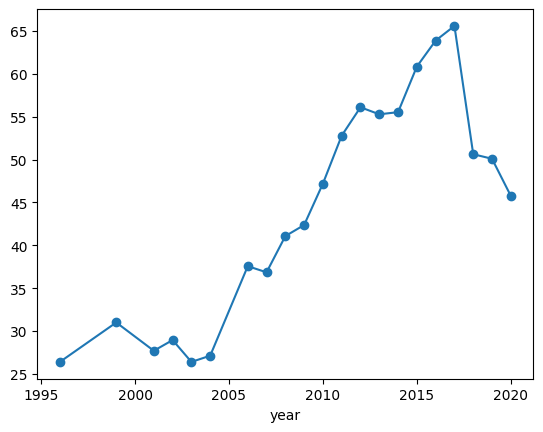

In [60]:
test.groupby('year')['mpg'].mean().plot(marker = 'o')

In [158]:
# непрерывные переменные необходимо группировать:

test['engineSize_group'] = pd.qcut(test['engineSize'], 5, duplicates = 'drop')

# а после этого уже спокойно применять функцию:
function('engineSize_group')

C:\Users\roman\AppData\Local\Temp\ipykernel_51320\3152809787.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])


,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
engineSize_group,,,,,
"(-0.001, 2.0]",1633,1413.144769,84.548387,-182.906397,1596.051166
"(2.0, 3.0]",504,2100.596832,377.577785,504.545666,1596.051166
"(3.0, 6.6]",20,3815.807705,1024.686745,2219.756539,1596.051166


In [159]:
# непрерывные переменные необходимо группировать:

test['engineSize_group_2'] = pd.cut(test['engineSize'], [0, 1.5, 2, 100])

# а после этого уже спокойно применять функцию:
function('engineSize_group_2')

C:\Users\roman\AppData\Local\Temp\ipykernel_51320\3152809787.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t = test.groupby(feature)['err', 'err_NO_abs'].agg(['count', 'mean'])


,err_count,err_mean,err_NO_abs_mean,difference_with_mean_err,test_MAE
engineSize_group_2,,,,,
"(0.0, 1.5]",279,1198.634102,142.974676,-397.417064,1596.051166
"(1.5, 2.0]",1347,1460.652606,72.166975,-135.398560,1596.051166
"(2.0, 100.0]",524,2166.062896,402.276600,570.011730,1596.051166


<Axes: xlabel='year'>

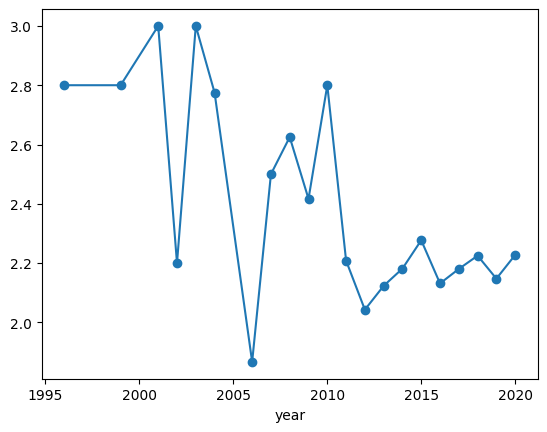

In [161]:
test.groupby('year')['engineSize'].mean().plot(marker = 'o')

# Самые важные фичи в CatBoost

In [62]:
model.get_feature_importance(prettified = True)

,Feature Id,Importances
0,year,22.601130
1,engineSize,19.819180
2,mileage,18.066599
3,model,16.389859
4,mpg,14.047470
5,fuelType,4.679322
6,transmission,3.212614
7,tax,1.183826


In [61]:
# интерпретация вклада каждой фичи в модель:

# библиотека shap
# !pip install shap

In [63]:
import shap
shap.initjs()

C:\Users\roman\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [64]:
X

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

In [65]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [66]:
# здесь отображен вклад каждой фичи в финальный результат:

# относительно базового значения: train['price'].mean()

pd.DataFrame(shap_values, columns = X)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,8787.657522,4897.543282,1152.426602,4301.034592,2657.450674,96.307362,8286.605098,4571.373299
1,-273.598210,171.898275,849.563998,598.469043,-86.304025,151.380575,-697.442561,-946.035233
2,-2534.686568,-2905.503582,150.011025,-3688.613073,-417.827600,-270.767323,1363.847794,-1035.315631
3,-3218.564288,4820.516912,394.426146,4557.095659,-1081.906371,-79.419403,7245.125415,-2939.080868
4,-453.827188,7522.493307,870.727982,5940.178831,-1484.912061,26.430281,1685.624756,-1774.382804
...,...,...,...,...,...,...,...,...
2152,-1450.730789,-4063.845291,216.510477,-4877.679235,194.246896,-163.476110,-667.280280,2490.638774
2153,-1356.999476,4832.711366,571.184184,1342.665511,-1668.533605,13.701973,1106.934182,3195.530306
2154,888.099449,3778.616745,132.892343,3308.680724,824.861603,219.160473,-1353.718394,-1047.220122
2155,-1719.310848,-2669.266448,273.152147,-3831.065778,1735.154793,-398.638274,-1670.084615,-607.534603


In [67]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], test[X].iloc[0,:])

# Топ-10 ошибок модели

In [68]:
shap_cols = [x + '_shap' for x in X]

In [69]:
shap_cols

['model_shap',
 'year_shap',
 'transmission_shap',
 'mileage_shap',
 'fuelType_shap',
 'tax_shap',
 'mpg_shap',
 'engineSize_shap']

In [96]:
pd.DataFrame(shap_values, columns = shap_cols)

,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,8787.657522,4897.543282,1152.426602,4301.034592,2657.450674,96.307362,8286.605098,4571.373299
1,-273.598210,171.898275,849.563998,598.469043,-86.304025,151.380575,-697.442561,-946.035233
2,-2534.686568,-2905.503582,150.011025,-3688.613073,-417.827600,-270.767323,1363.847794,-1035.315631
3,-3218.564288,4820.516912,394.426146,4557.095659,-1081.906371,-79.419403,7245.125415,-2939.080868
4,-453.827188,7522.493307,870.727982,5940.178831,-1484.912061,26.430281,1685.624756,-1774.382804
...,...,...,...,...,...,...,...,...
2152,-1450.730789,-4063.845291,216.510477,-4877.679235,194.246896,-163.476110,-667.280280,2490.638774
2153,-1356.999476,4832.711366,571.184184,1342.665511,-1668.533605,13.701973,1106.934182,3195.530306
2154,888.099449,3778.616745,132.892343,3308.680724,824.861603,219.160473,-1353.718394,-1047.220122
2155,-1719.310848,-2669.266448,273.152147,-3831.065778,1735.154793,-398.638274,-1670.084615,-607.534603


In [97]:
shap_values_df = pd.DataFrame(shap_values, columns = shap_cols)

In [95]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_predict,err,err_percent,err_NO_abs,price_group,mileage_group,tax_group,tax_group_2,mpg_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57518.642307,4528.642307,0.085462,4528.642307,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(5.499, 42.2]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22536.175739,1544.824261,0.064151,-1544.824261,"(23131.6, 29990.0]","(9825.4, 24299.0]","(116.0, 232.0]","(145.0, 150.0]","(55.4, 64.2]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13429.388918,430.388918,0.033109,430.388918,"(1199.999, 13995.0]","(43519.8, 190000.0]","(116.0, 232.0]","(150.0, 580.0]","(42.2, 50.4]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32466.437079,20471.437079,1.706664,20471.437079,"(1199.999, 13995.0]","(0.999, 4063.2]","(116.0, 232.0]","(145.0, 150.0]","(5.499, 42.2]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.576980,5225.576980,0.174915,5225.576980,"(23131.6, 29990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(5.499, 42.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14446.628320,552.371680,0.036827,-552.371680,"(13995.0, 18500.0]","(43519.8, 190000.0]","(116.0, 232.0]","(150.0, 580.0]","(50.4, 55.4]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30805.438318,1129.438318,0.038059,1129.438318,"(23131.6, 29990.0]","(4063.2, 9825.4]","(116.0, 232.0]","(125.0, 145.0]","(5.499, 42.2]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29519.616699,1050.383301,0.034360,-1050.383301,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(42.2, 50.4]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13880.650250,1118.349750,0.074562,-1118.349750,"(13995.0, 18500.0]","(43519.8, 190000.0]","(-0.58, 116.0]","(-0.001, 125.0]","(64.2, 470.8]"


In [98]:
pd.concat([test.reset_index(), shap_values_df], axis = 1)

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_predict,err,err_percent,err_NO_abs,price_group,mileage_group,tax_group,tax_group_2,mpg_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
0,4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,57518.642307,4528.642307,0.085462,4528.642307,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(5.499, 42.2]",8787.657522,4897.543282,1152.426602,4301.034592,2657.450674,96.307362,8286.605098,4571.373299
1,4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22536.175739,1544.824261,0.064151,-1544.824261,"(23131.6, 29990.0]","(9825.4, 24299.0]","(116.0, 232.0]","(145.0, 150.0]","(55.4, 64.2]",-273.598210,171.898275,849.563998,598.469043,-86.304025,151.380575,-697.442561,-946.035233
2,9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13429.388918,430.388918,0.033109,430.388918,"(1199.999, 13995.0]","(43519.8, 190000.0]","(116.0, 232.0]","(150.0, 580.0]","(42.2, 50.4]",-2534.686568,-2905.503582,150.011025,-3688.613073,-417.827600,-270.767323,1363.847794,-1035.315631
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32466.437079,20471.437079,1.706664,20471.437079,"(1199.999, 13995.0]","(0.999, 4063.2]","(116.0, 232.0]","(145.0, 150.0]","(5.499, 42.2]",-3218.564288,4820.516912,394.426146,4557.095659,-1081.906371,-79.419403,7245.125415,-2939.080868
4,7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35100.576980,5225.576980,0.174915,5225.576980,"(23131.6, 29990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(5.499, 42.2]",-453.827188,7522.493307,870.727982,5940.178831,-1484.912061,26.430281,1685.624756,-1774.382804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152,9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14446.628320,552.371680,0.036827,-552.371680,"(13995.0, 18500.0]","(43519.8, 190000.0]","(116.0, 232.0]","(150.0, 580.0]","(50.4, 55.4]",-1450.730789,-4063.845291,216.510477,-4877.679235,194.246896,-163.476110,-667.280280,2490.638774
2153,6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30805.438318,1129.438318,0.038059,1129.438318,"(23131.6, 29990.0]","(4063.2, 9825.4]","(116.0, 232.0]","(125.0, 145.0]","(5.499, 42.2]",-1356.999476,4832.711366,571.184184,1342.665511,-1668.533605,13.701973,1106.934182,3195.530306
2154,1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29519.616699,1050.383301,0.034360,-1050.383301,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(42.2, 50.4]",888.099449,3778.616745,132.892343,3308.680724,824.861603,219.160473,-1353.718394,-1047.220122
2155,4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13880.650250,1118.349750,0.074562,-1118.349750,"(13995.0, 18500.0]","(43519.8, 190000.0]","(-0.58, 116.0]","(-0.001, 125.0]","(64.2, 470.8]",-1719.310848,-2669.266448,273.152147,-3831.065778,1735.154793,-398.638274,-1670.084615,-607.534603


In [99]:
test_shap = pd.concat([test.reset_index(), shap_values_df], axis = 1)

In [75]:
# чтобы были видны все колонки:

pd.options.display.max_columns = 100

In [83]:
test_shap.sort_values(by = 'err', ascending = False).head(10)

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_predict,err,err_percent,err_NO_abs,price_group,mileage_group,tax_group,tax_group_2,mpg_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32466.437079,20471.437079,1.706664,20471.437079,"(1199.999, 13995.0]","(0.999, 4063.2]","(116.0, 232.0]","(145.0, 150.0]","(5.499, 42.2]",-3218.564288,4820.516912,394.426146,4557.095659,-1081.906371,-79.419403,7245.125415,-2939.080868
144,1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31813.971590,15736.028410,0.330936,-15736.028410,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(55.4, 64.2]",-328.027141,5934.782190,689.688864,4642.610748,96.762560,94.876117,-966.294401,-1118.671223
1914,6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28217.113216,14302.886784,0.336380,-14302.886784,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(64.2, 470.8]",-399.270565,5076.841559,552.043712,4305.796389,-41.963602,100.593403,-2774.820098,-1370.351458
1349,6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,84722.734120,13727.734120,0.193362,13727.734120,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(5.499, 42.2]",13433.009993,5089.636640,2268.815997,8714.980609,393.754385,294.774942,22437.296013,9322.221663
706,2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32355.954817,12624.045183,0.280659,-12624.045183,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(55.4, 64.2]",3200.270663,3214.386624,747.837519,5395.574461,-481.371882,131.503764,-872.035547,-1748.454662
1769,6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30101.920278,12393.079722,0.291636,-12393.079722,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(145.0, 150.0]","(55.4, 64.2]",-264.679227,4978.320243,640.648437,3743.368365,196.648553,-518.074277,-376.328117,-1066.227576
829,4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46372.797246,12289.202754,0.209492,-12289.202754,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(5.499, 42.2]",6812.352999,3632.513357,748.955325,4767.131357,-3178.956779,-153.148115,6864.367457,4111.337768
1696,6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,48825.636478,11173.363522,0.186226,-11173.363522,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(145.0, 150.0]","(5.499, 42.2]",7241.493356,4796.478021,1155.211410,3856.155849,-4342.247678,-489.823901,9589.010948,4251.114597
1642,5264,5 Series,2019,38450,Automatic,14522,Diesel,145,62.8,2.0,27328.799835,11121.200165,0.289238,-11121.200165,"(29990.0, 74990.0]","(9825.4, 24299.0]","(116.0, 232.0]","(125.0, 145.0]","(55.4, 64.2]",1608.929792,4469.139530,638.888011,3.396342,231.511120,238.066624,-1533.888612,-1095.486849
1430,4245,Z4,2020,50800,Semi-Auto,1142,Petrol,145,33.2,3.0,39946.678368,10853.321632,0.213648,-10853.321632,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(5.499, 42.2]",1504.387082,5444.634181,1100.897375,3183.908333,-3824.428740,-166.878755,6735.660483,3200.254533


In [100]:
test_shap = test_shap.sort_values(by = 'err', ascending = False)

In [101]:
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_predict,err,err_percent,err_NO_abs,price_group,mileage_group,tax_group,tax_group_2,mpg_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,32466.437079,20471.437079,1.706664e+00,20471.437079,"(1199.999, 13995.0]","(0.999, 4063.2]","(116.0, 232.0]","(145.0, 150.0]","(5.499, 42.2]",-3218.564288,4820.516912,394.426146,4557.095659,-1081.906371,-79.419403,7245.125415,-2939.080868
144,1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31813.971590,15736.028410,3.309365e-01,-15736.028410,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(55.4, 64.2]",-328.027141,5934.782190,689.688864,4642.610748,96.762560,94.876117,-966.294401,-1118.671223
1914,6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28217.113216,14302.886784,3.363802e-01,-14302.886784,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(64.2, 470.8]",-399.270565,5076.841559,552.043712,4305.796389,-41.963602,100.593403,-2774.820098,-1370.351458
1349,6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,84722.734120,13727.734120,1.933620e-01,13727.734120,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(5.499, 42.2]",13433.009993,5089.636640,2268.815997,8714.980609,393.754385,294.774942,22437.296013,9322.221663
706,2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32355.954817,12624.045183,2.806591e-01,-12624.045183,"(29990.0, 74990.0]","(0.999, 4063.2]","(116.0, 232.0]","(125.0, 145.0]","(55.4, 64.2]",3200.270663,3214.386624,747.837519,5395.574461,-481.371882,131.503764,-872.035547,-1748.454662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,10340,3 Series,2017,11300,Automatic,83055,Petrol,125,51.4,1.5,11298.224892,1.775108,1.570892e-04,-1.775108,"(1199.999, 13995.0]","(43519.8, 190000.0]","(116.0, 232.0]","(-0.001, 125.0]","(50.4, 55.4]",-1750.706036,-1553.726780,73.178793,-4542.081776,-595.584264,28.991301,-1129.164546,-2000.925677
1911,2886,4 Series,2019,24980,Semi-Auto,6917,Diesel,145,65.7,2.0,24981.264233,1.264233,5.060980e-05,1.264233,"(23131.6, 29990.0]","(4063.2, 9825.4]","(116.0, 232.0]","(125.0, 145.0]","(64.2, 470.8]",-322.182150,3719.828875,777.020764,1619.204271,-316.940437,123.363477,-2198.357554,-1188.916890
1853,764,3 Series,2018,17498,Semi-Auto,16149,Petrol,145,51.4,1.5,17497.181684,0.818316,4.676626e-05,-0.818316,"(13995.0, 18500.0]","(9825.4, 24299.0]","(116.0, 232.0]","(125.0, 145.0]","(50.4, 55.4]",-1800.360458,29.380314,701.885236,-36.088318,-713.228068,211.551828,-1089.416823,-2574.785903
1512,4191,5 Series,2018,23980,Semi-Auto,19203,Diesel,145,65.7,2.0,23980.568838,0.568838,2.372136e-05,0.568838,"(23131.6, 29990.0]","(9825.4, 24299.0]","(116.0, 232.0]","(125.0, 145.0]","(64.2, 470.8]",1803.630790,885.553578,984.404589,-371.587358,-7.175350,363.603332,-1449.135139,-996.969480


In [86]:
# получаем визуализацию самой большой ошибки - в списке топ-10 ошибок:

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values[0,:], test[X].iloc[0,:])

In [88]:
# получаем визуализацию топ-10 ошибок:

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, test_shap[shap_cols].head(10).values, test[X].head(10))

In [102]:
# получаем визуализацию вообще всех ошибок:

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values, test_shap[X])

# Визуализация shap - Dependence Plot

In [ ]:
# внимательно посмотреть на работу каждой переменной, оценить ее вклад в модель

In [104]:
# смотрим на наши переменные:
X

['model',
 'year',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize']

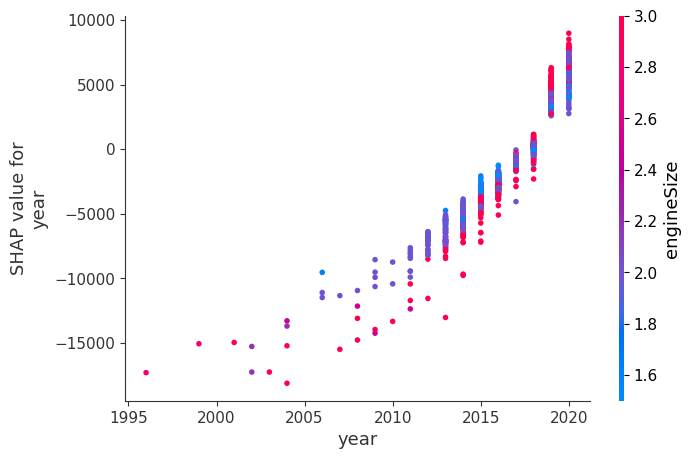

In [110]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset

# выбрав параметр year - видим как год влияет на предсказание цены нашей моделью
# (второй парамет выбирается автоматически, чтобы подкрашивать график от выбранного параметра)

shap.dependence_plot("year", shap_values, test[X])

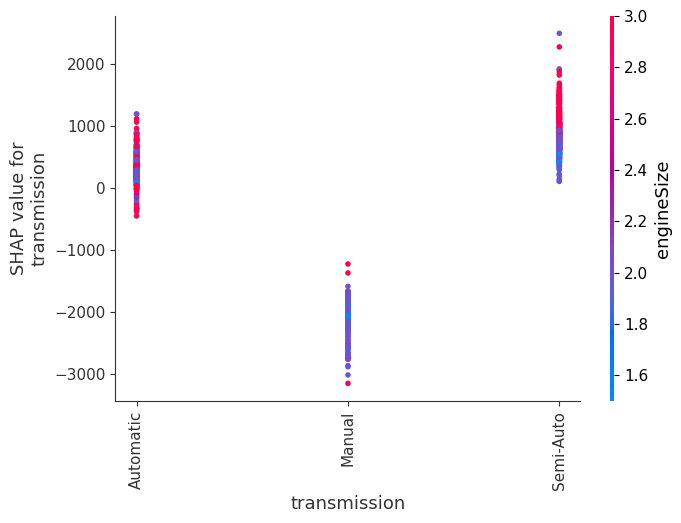

In [111]:
# выбрав transmission - видим что самые дешевые обчно Manual
# по цвету engineSize видим распределение объема двигателя для каждой категории - как эти параметры определяют предсказание

shap.dependence_plot("transmission", shap_values, test[X])

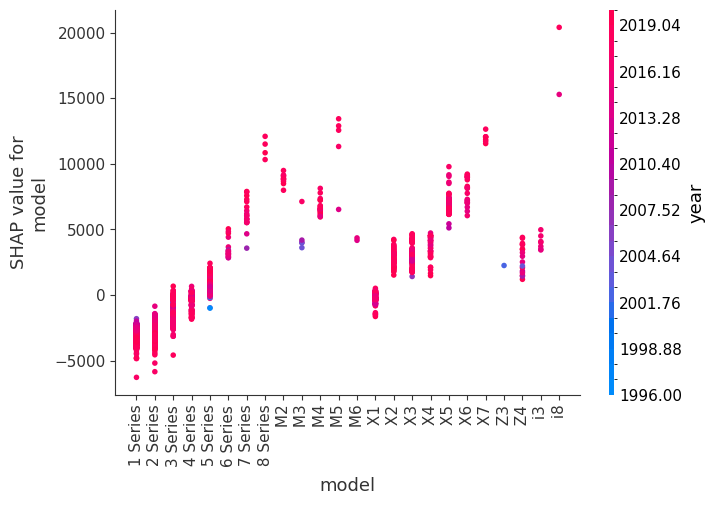

In [113]:
# за какие модели-машин наш алгоритм больше всего прибавляет цену, за какие меньше:

shap.dependence_plot("model", shap_values, test[X])

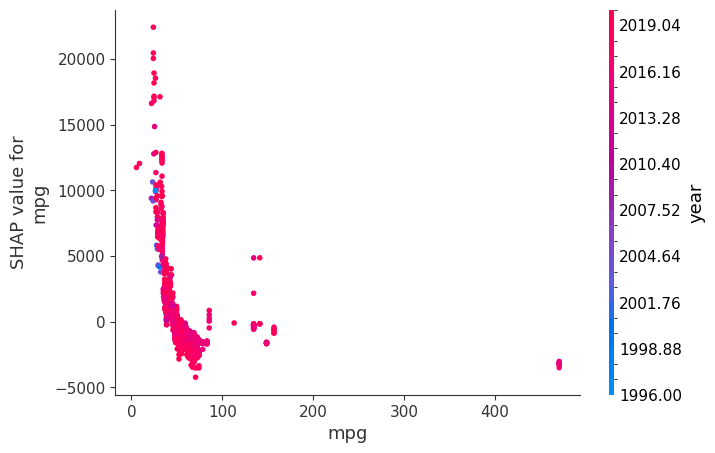

In [114]:
shap.dependence_plot("mpg", shap_values, test[X])

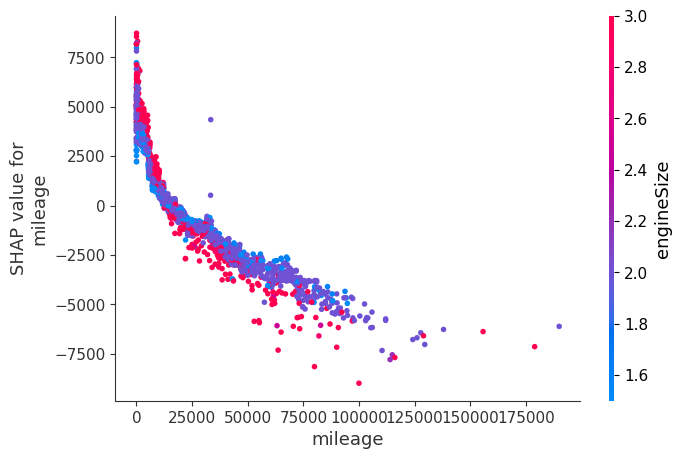

In [115]:
# всё понятно с пробегом - чем меньше mileage - тем больше модель прибавляет

shap.dependence_plot("mileage", shap_values, test[X])

# Визуализация shap - Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


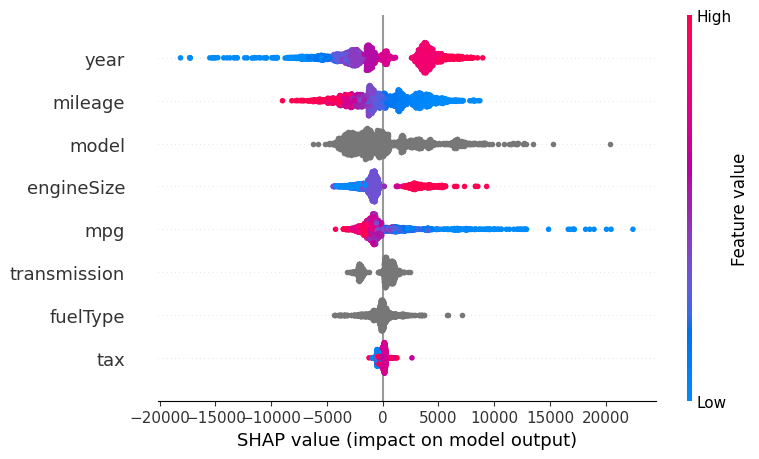

In [117]:
# summarize the effects of all the features
shap.summary_plot(shap_values, test[X])